In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sys
import os.path

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from UniformTrees.dust import Dualgraph, rescalate
from UniformTrees.dfsmatrix import dfsmatrix
from anim.animSLE import animSLE

In [2]:
grafo = Dualgraph((3, 3))

f = grafo.graph.get_start()
print(f)
grafo.wilson()
s = grafo.path
print(s)

[2, 2]
[array([[1, 0],
       [2, 0],
       [2, 1],
       [2, 2]]), array([[0, 1],
       [1, 1],
       [1, 0]]), array([[1, 2],
       [1, 1]]), array([[0, 2],
       [1, 2]]), array([[0, 0],
       [0, 1]])]


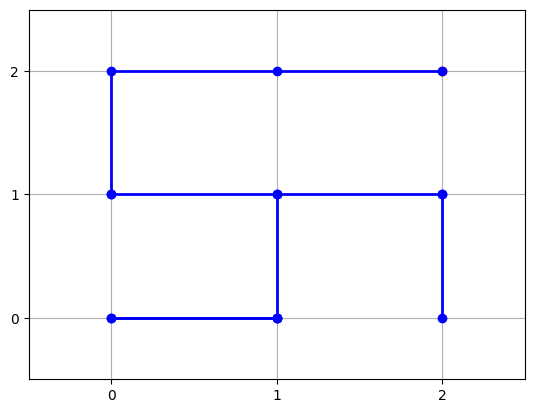

In [3]:
count = 0
arr = []
for i in s:
    for j in i:
        arr.append(j)
    arr.append(None)  # Marcador para separar listas
    count += 1
M = grafo.graph.grid

m, n = M.shape
fig, ax = plt.subplots()
ax.set_xlim(-0.5, n-0.5)
ax.set_ylim(-0.5, m-0.5)
ax.set_xticks(np.arange(M.shape[0]))
ax.set_yticks(np.arange(M.shape[1]))
ax.grid(True)

# Punto inicial en rojo
ax.plot(f[1], f[0], 'ro', label='Punto a')  # punto `a` en rojo

# Lista para manejar las líneas acumuladas
lines = []
current_xdata, current_ydata = [], []

def init():
    return lines

def update(frame):
    global current_xdata, current_ydata
    if arr[frame] is None:  # Detectar cambio de sublista
        # Crear una nueva línea para la siguiente sublista
        new_line, = ax.plot(current_ydata, current_xdata, color='blue', marker='o', linestyle='-', lw=2)
        lines.append(new_line)  # Guardar la línea actual
        current_xdata, current_ydata = [], []  # Reiniciar los datos
    else:
        x, y = arr[frame]
        current_xdata.append(x)
        current_ydata.append(y)

        # Actualizar la línea actual en tiempo real
        if len(lines) > 0:
            lines[-1].set_data(current_ydata, current_xdata)
        else:
            line, = ax.plot(current_ydata, current_xdata, color='blue', marker='o', linestyle='-', lw=2)
            lines.append(line)  # Crear la primera línea si no existe
    return lines


anim = FuncAnimation(fig,
                     update,
                     frames=len(arr),
                     init_func=init,
                     blit=False,  # Necesario para redibujar todo
                     interval=500)

HTML(anim.to_jshtml())


In [4]:
grafo.scalate()

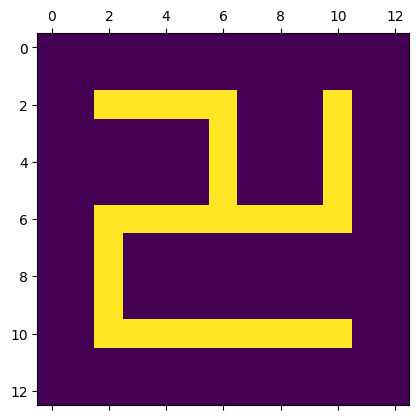

In [5]:
grafo.gridact()
# print(grafo.grid)
plt.matshow(grafo.grid)

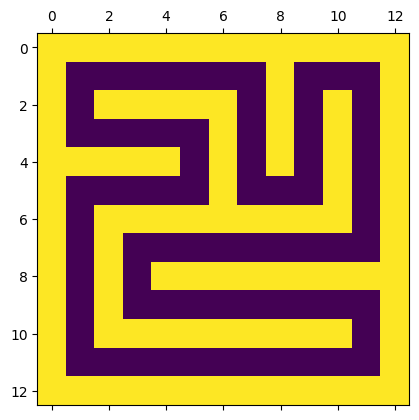

In [6]:
d = grafo.dual()
plt.matshow(d + grafo.grid)

In [7]:
p = dfsmatrix(d+grafo.grid)

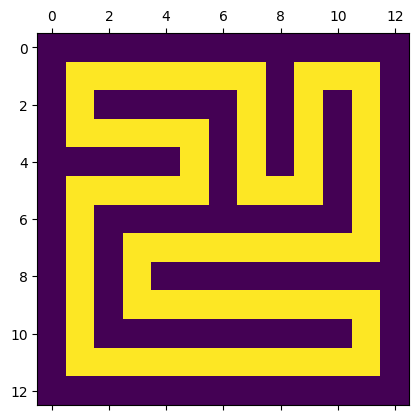

In [8]:
M2 = np.zeros(d.shape)
M2[p[:,0], p[:,1]] = 1
plt.matshow(M2)

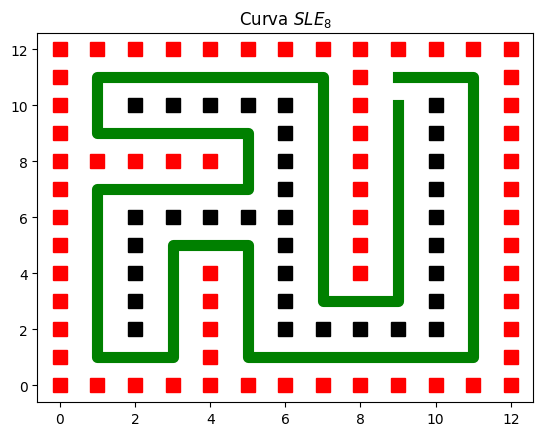

In [9]:
animSLE(grafo.grid, d, p)